In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
datos_ordenamiento2 = pd.read_csv('../scaleup_ordenamiento2.csv')
datos_ordenamiento3 = pd.read_csv('../scaleup_ordenamiento3.csv')
datos_ordenamiento_clase = pd.read_csv('../scaleup_ordenamiento_clase.csv')

longitud_cadena1 = datos_ordenamiento_clase['longitud_cadena']
tiempo1 = datos_ordenamiento_clase['tiempo']

longitud_cadena2 =datos_ordenamiento2['longitud_cadena']
tiempo2 = datos_ordenamiento2['tiempo']

longitud_cadena3 =datos_ordenamiento3['longitud_cadena']
tiempo3 = datos_ordenamiento3['tiempo']
datos_ordenamiento_clase

,longitud_cadena,tiempo
0,100000,88.907068
1,150000,198.695277
2,200000,346.481413
3,250000,542.140576
4,300000,781.554359


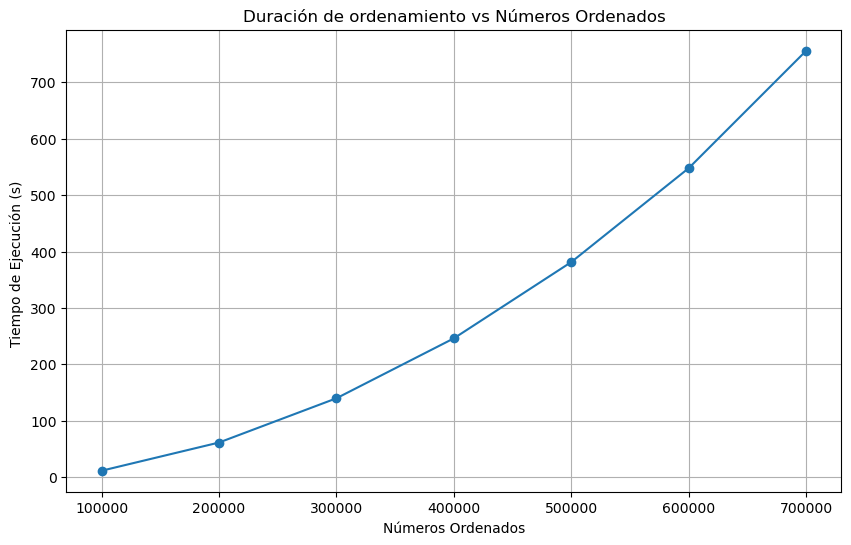

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(longitud_cadena2, tiempo2, marker='o')

# Añadir títulos y etiquetas
plt.title('Duración de ordenamiento vs Números Ordenados')
plt.xlabel('Números Ordenados')
plt.ylabel('Tiempo de Ejecución (s) ')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [6]:
# Ajuste cuadrático
coeficientes2 = np.polyfit(longitud_cadena2, tiempo2, 2)
coeficientes3 = np.polyfit(longitud_cadena3, tiempo3, 2)

coeficientes1 = np.polyfit(longitud_cadena1, tiempo1, 2)

polinomio2 = np.poly1d(coeficientes2)
polinomio3 = np.poly1d(coeficientes3)

polinomio1 = np.poly1d(coeficientes1)

tiempo_ajustado1 = polinomio1(longitud_cadena1)
tiempo_ajustado2 = polinomio2(longitud_cadena2)
tiempo_ajustado3 = polinomio3(longitud_cadena3) 

Los coeficientes son[ 1.53462656e-09  4.10356298e-06 -2.33119071e+00]:


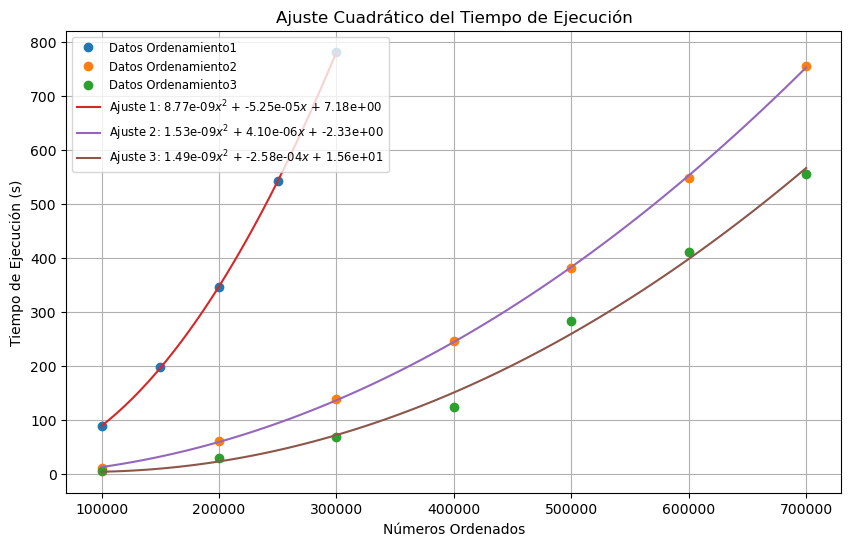

In [8]:
# Generar valores para la curva ajustada
x_fit2 = np.linspace(longitud_cadena2.min(), longitud_cadena2.max(), 100)
y_fit2 = polinomio2(x_fit2)

x_fit1= np.linspace(longitud_cadena1.min(), longitud_cadena1.max(), 100)
y_fit1=polinomio1(x_fit1)

x_fit3 = np.linspace(longitud_cadena3.min(), longitud_cadena3.max(), 100)
y_fit3 = polinomio3(x_fit3)


# Crear etiquetas dinámicas para la leyenda con los coeficientes

label_fit1 = f'Ajuste 1: {coeficientes1[0]:.2e}$x^2$ + {coeficientes1[1]:.2e}$x$ + {coeficientes1[2]:.2e}'
label_fit2 = f'Ajuste 2: {coeficientes2[0]:.2e}$x^2$ + {coeficientes2[1]:.2e}$x$ + {coeficientes2[2]:.2e}'
label_fit3 = f'Ajuste 3: {coeficientes3[0]:.2e}$x^2$ + {coeficientes3[1]:.2e}$x$ + {coeficientes3[2]:.2e}'




# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(longitud_cadena1, tiempo1, 'o', label='Datos Ordenamiento1')
plt.plot(longitud_cadena2, tiempo2, 'o', label='Datos Ordenamiento2')
plt.plot(longitud_cadena3, tiempo3, 'o', label='Datos Ordenamiento3')

#plt.plot(x_fit1, y_fit1, '-', label='Ajuste cuadrático Ordenamiento1')
#plt.plot(x_fit2, y_fit2, '-', label='Ajuste cuadrático Ordenamiento2')
#plt.plot(x_fit3, y_fit3, '-', label='Ajuste cuadrático Ordenamiento3')

# Usar las etiquetas dinámicas creadas arriba
plt.plot(x_fit1, y_fit1, '-', label=label_fit1)
plt.plot(x_fit2, y_fit2, '-', label=label_fit2)
plt.plot(x_fit3, y_fit3, '-', label=label_fit3)

plt.title('Ajuste Cuadrático del Tiempo de Ejecución')
plt.xlabel('Números Ordenados')
plt.ylabel('Tiempo de Ejecución (s)')
plt.legend()
plt.grid(True)

print(f'Los coeficientes son{coeficientes2}:')

mse_1 = mean_squared_error(tiempo1, tiempo_ajustado1)
r2_1 = r2_score(tiempo1, tiempo_ajustado1)

mse_2 = mean_squared_error(tiempo2, tiempo_ajustado2)
r2_2 = r2_score(tiempo2, tiempo_ajustado2)

mse_3 = mean_squared_error(tiempo3, tiempo_ajustado3)
r2_3 = r2_score(tiempo3, tiempo_ajustado3)

#print(f'Error cuadratico medio de ordenamiento1: {mse_1}')
#print(f"R² de ordenamiento 1: {r2_1}")

#print(f'Error cuadratico medio de ordenamiento2: {mse_2}')
#print(f"R² de ordenamiento 2: {r2_2}")

#print(f'Error cuadratico medio de ordenamiento3: {mse_3}')
#print(f"R² de ordenamiento 3: {r2_3}")
plt.legend(loc='upper left', fontsize='small')


In [ ]:
datos_merge_sort = pd.read_csv('../scaleup_merge_sort.csv')

datos_merge_sort

,longitud_ordenamiento,tiempo
0,100000,0.023189
1,100000,0.022008
2,100000,0.023404
3,100000,0.022520
4,100000,0.022301
...,...,...
595,2000000,0.519210
596,2000000,0.611219
597,2000000,0.534473
598,2000000,0.494527


In [ ]:
datos_merge_sort_agrupados = datos_merge_sort.groupby('longitud_ordenamiento', as_index=False)['tiempo'].mean()
datos_merge_sort_agrupados.columns

Index(['longitud_ordenamiento', 'tiempo'], dtype='object')

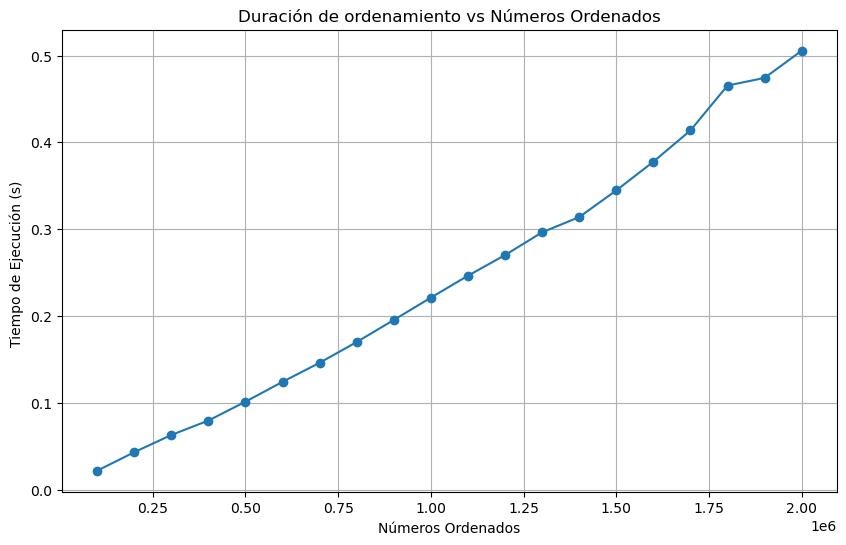

In [ ]:
longitud_cadena_merge_sort=datos_merge_sort_agrupados['longitud_ordenamiento']
tiempo_merge_sort = datos_merge_sort_agrupados['tiempo']

plt.figure(figsize=(10, 6))
plt.plot(longitud_cadena_merge_sort, tiempo_merge_sort, marker='o')

# Añadir títulos y etiquetas
plt.title('Duración de ordenamiento vs Números Ordenados')
plt.xlabel('Números Ordenados')
plt.ylabel('Tiempo de Ejecución (s) ')

# Mostrar el gráfico
plt.grid(True)
plt.show()

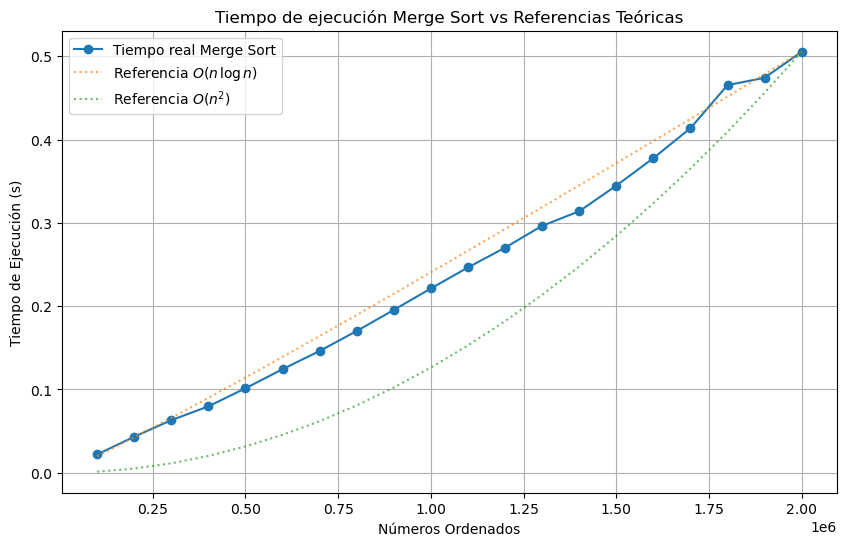

In [ ]:
n = np.array(longitud_cadena_merge_sort)
t = np.array(tiempo_merge_sort)

# Factores de escala 
escala_nlogn = t[-1] / (n[-1]*np.log2(n[-1]))
escala_n2 =t[-1]/(n[-1]**2)  


# Referencias teóricas ajustadas
o_nlogn = escala_nlogn * n*np.log2(n)
o_n2 = escala_n2 * n**2


plt.figure(figsize=(10,6))
plt.plot(n, t, 'o-', label="Tiempo real Merge Sort")
plt.plot(n, o_nlogn, ':', label="Referencia $O(n\,\log n)$", alpha=0.7)
plt.plot(n, o_n2, ':', label="Referencia $O(n^2)$", alpha=0.7)
plt.xlabel("Números Ordenados")
plt.ylabel("Tiempo de Ejecución (s)")
plt.title("Tiempo de ejecución Merge Sort vs Referencias Teóricas")
plt.legend()
plt.grid(True)
plt.show()

Parámetro a: 1.2018878280963941e-08


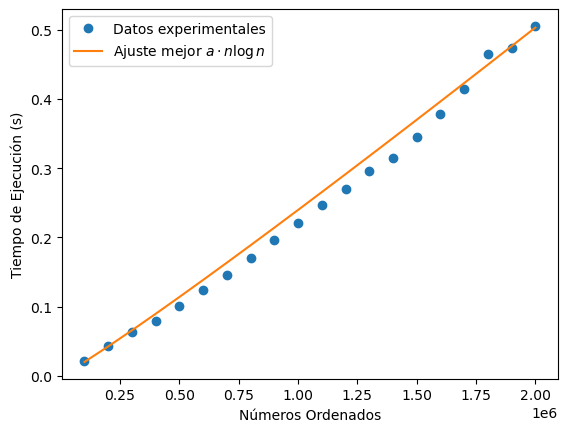

In [ ]:
n = np.array(longitud_cadena_merge_sort)
tiempos =np.array(tiempo_merge_sort)

X = n*np.log2(n)

a, b = np.polyfit(X, tiempos, 1)  
print("Parámetro a:", a)


plt.plot(n, tiempos, 'o', label='Datos experimentales')
plt.plot(n, a*X, '-', label=r'Ajuste mejor $a \cdot n\log n$')
plt.legend()
plt.xlabel('Números Ordenados')
plt.ylabel('Tiempo de Ejecución (s)')
plt.show()